**Evalulating Randomness Using ChatGPT**

---

By Collin Olson

**Preface:**

---

This small project was created to evalulate how random ChatGPT can be when asked to via a prompt. I may add on more to it later.

**Methodology:**

---

To conduct this experiment, I used the prompt `Generate a sentence of 20 completely random words`. Then, I took the results and put them into a labeled text file. This was done so I could use a heatmap and cosine similarities to compare all the results. Afterwards, I used the "Regenerate" option below the prompt to create a new string of twenty words. I then put these results into another text file. I repeated this fifty times, then analyzed the data.

**Implementation:**

---



In [1]:
##Imports needed modules and libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Mounts drive (that is where my text files are stored)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Define path to the text files in drive
my_path = "/content/drive/MyDrive/ChatGPTRandomProject/TextFiles"

In [4]:
#List and sort file names
file_names = !ls {my_path}
file_names = sorted(file_names)

In [5]:
#Split the combined string by tabs and new lines, then filter out the empty strings
combined_string = ' '.join(file_names)
file_list = [name.strip() for name in combined_string.split() if name.strip() and "." in name]

#Remove the extension
text_titles = sorted([name.split('.')[0] for name in file_list])

In [6]:
#Sort the text files using glob
text_files = glob.glob(f"{my_path}/*.txt")
text_files = sorted(text_files)

Now, we calculate the TF-IDF values and use those to create a heatmap of all the files.

In [7]:
#Create vectorizer
tfidf_vectorizer = TfidfVectorizer(input = 'filename', stop_words = 'english')

#Create a vector using the vectorizer
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

#Create a dataframe using the vector
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index = text_titles, columns = tfidf_vectorizer.get_feature_names_out())

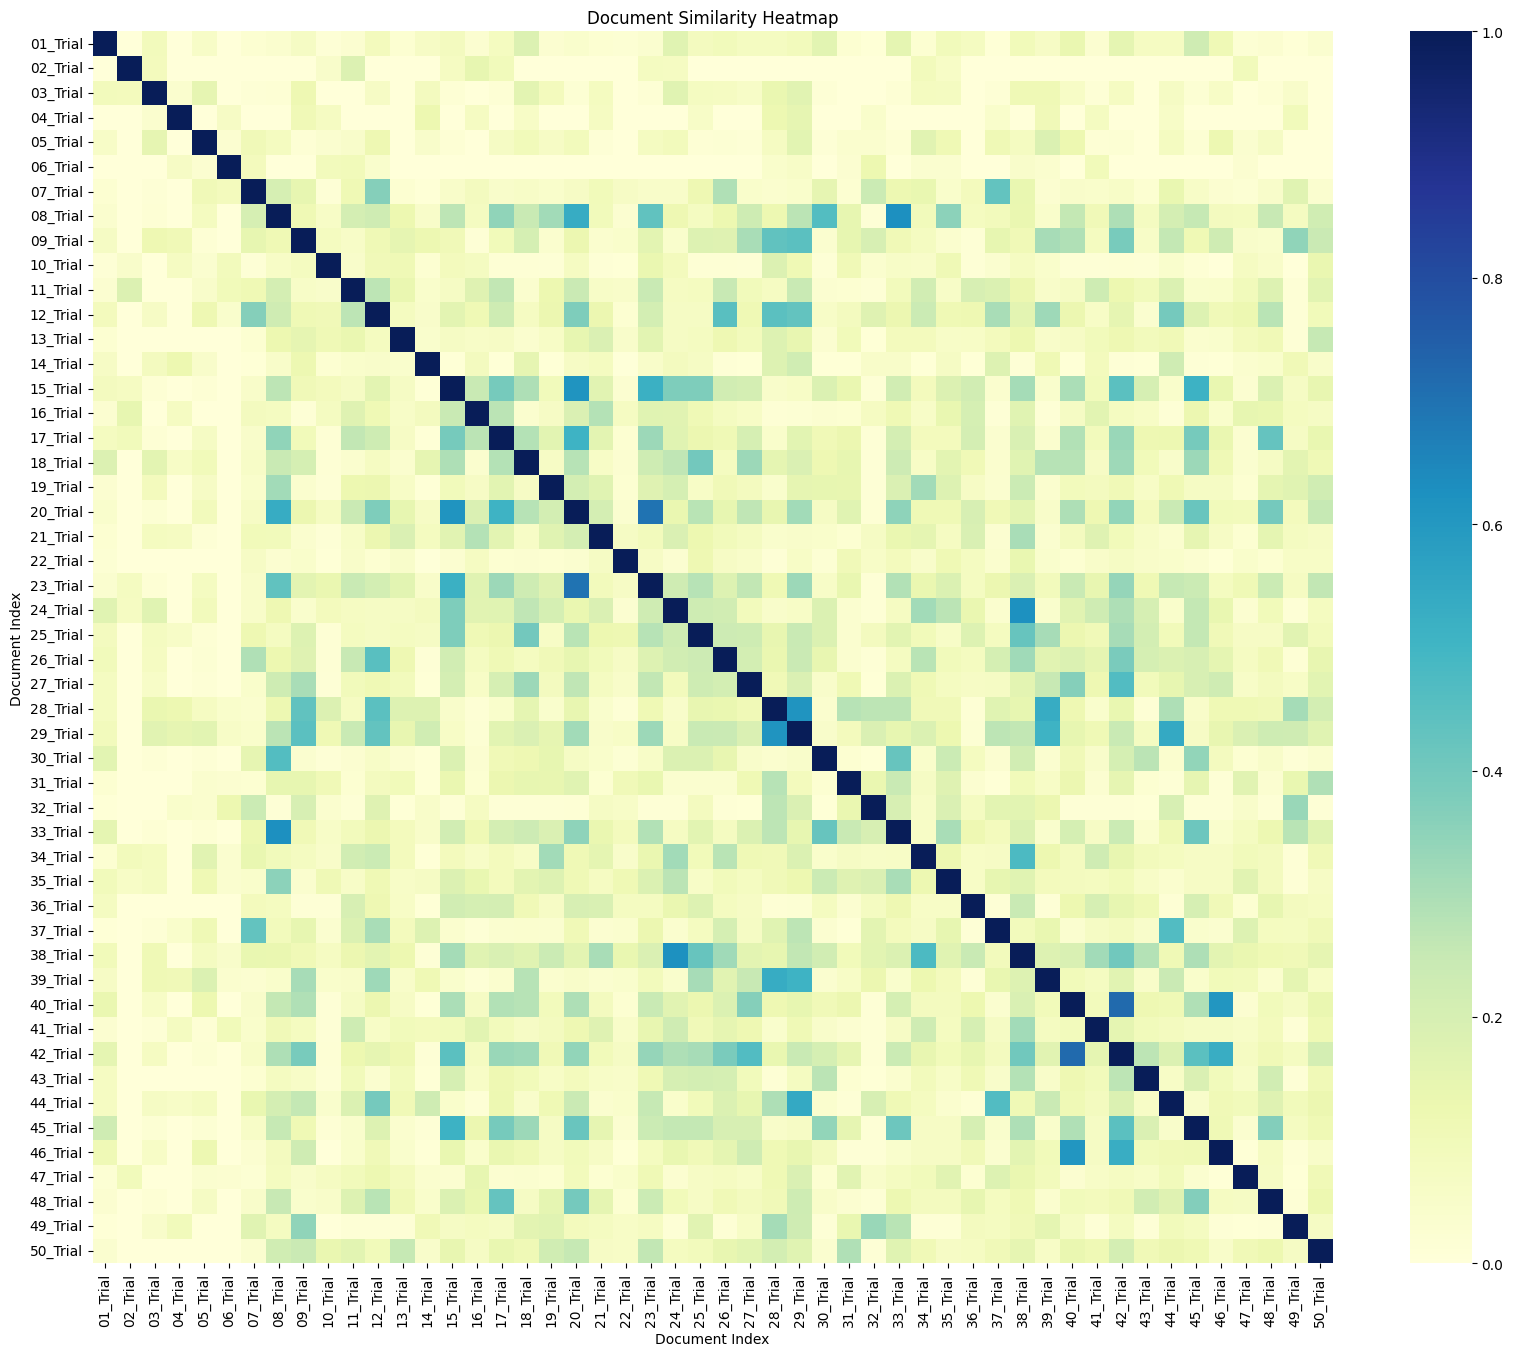

In [8]:
#Create dot product from dataframe
similarity_matrix = tfidf_df.dot(tfidf_df.T)

#Generate the heatmap
plt.figure(figsize=(20, 16)) #This part altered so the heatmap for every document is displayed
sns.heatmap(similarity_matrix, cmap="YlGnBu")
plt.title('Document Similarity Heatmap')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

Now, we can use Cosine Similarities to see which documents are the most similar to others.

In [9]:
#This function calculates the cosine simularity to find the three most simular documents to the input
def find_most_similar_docs_by_title(tfidf_vector, target_doc_title, text_titles, top_n = 3):
  if target_doc_title in text_titles:
    target_doc_index = text_titles.index(target_doc_title)
  else:
    return "This document does not exist"

  #Calculate the cosine simularity
  cosine_similarities = cosine_similarity(tfidf_vector[target_doc_index], tfidf_vector).flatten()

  #Find the top (top_n + 3) indices of the documents
  top_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

  #Assign top_real to most_similar_doc_indices
  most_similar_doc_indices = top_indices

  #Map indices to titles
  most_similar_doc_titles = [text_titles[i] for i in most_similar_doc_indices]

  #Return the most similar titles
  return most_similar_doc_titles

In [10]:
#Randomly creates a title to use for the function
random_number = random.randint(1, 50)
print(random_number)

if random_number < 10:
  random_number_string = "0" + str(random_number)
else:
  random_number_string = str(random_number)

random_title = random_number_string + "_Trial"
similar_docs_titles = find_most_similar_docs_by_title(tfidf_vector, random_title, text_titles)
print("Titles of the 3 most similar documents for trial " + str(random_number) + ":", similar_docs_titles)


22
Titles of the 3 most similar documents for trial 22: ['38_Trial', '25_Trial', '35_Trial']


**Analysis:**

---

If each response was truly random, the heatmap should ideally be completely yellow. However, that is not the case. In the responses, they all seemed to follow a basic sentence structure, even when asked to use randomly generated words. There were also a lot of commonly recurring words, most notably "purple", "elephant", "monkey", and other animal names. It seems like ChatGPT associates these words with "randomness". Interestingly, the first seven or so responses show that they were pretty different in terms of randomness. This may show that the temperature slowly changes the more the same prompt is regenerated.

**Conclusion:**

---

One big flaw with this expirament is that it was done with GPT 3.5. Perhaps the results would have been better if it was done with the most recent version of GPT. Nonetheless, this research can be used to show that ChatGPT's responses are not truly random yet, but hopefully, this can be fixed in the future.